In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
df<-read.csv("/kaggle/input/online-shoppers-intentioncsv/online_shoppers_intention.csv")
library(ggplot2)
library(forcats)
library(corrplot)

corrplot 0.92 loaded



In [10]:
library(tidyverse)


# **Data Profiling**

In [11]:
#summary of the dataframe
summary(df)


 Administrative   Administrative_Duration Informational    
 Min.   : 0.000   Min.   :   0.00         Min.   : 0.0000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.0000  
 Median : 1.000   Median :   7.50         Median : 0.0000  
 Mean   : 2.315   Mean   :  80.82         Mean   : 0.5036  
 3rd Qu.: 4.000   3rd Qu.:  93.26         3rd Qu.: 0.0000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.0000  
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :   0.00        Min.   :  0.00   Min.   :    0.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  184.1        
 Median :   0.00        Median : 18.00   Median :  598.9        
 Mean   :  34.47        Mean   : 31.73   Mean   : 1194.8        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1464.2        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
  BounceRates         ExitRates         PageValues        SpecialDay     
 Min.   :0.000000   Min.   :0.00000   Min.   :  0.0

In [12]:
#structure of columns to identify outliers
str(df)


'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 0 2 3 ...
 $ ProductRelated_Duration: num  0 64 0 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : chr  "Returning_Visitor" "Returning_Visitor" "Returning_Visito

In [14]:
#identifying nulls
colSums(is.na(df))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [15]:
# Identify numerical, categorical and boolean columns
num_cols <- names(df)[sapply(df, is.numeric)]
cat_cols <- names(df)[sapply(df, is.character)]
bool_cols <- names(df)[sapply(df, is.logical)]

# Print out the number and names of numerical, categorical and boolean columns
print(paste("There are", length(num_cols), "numerical columns,", length(cat_cols), "categorical columns and", length(bool_cols), "boolean columns in the dataset\n"))

[1] "There are 14 numerical columns, 2 categorical columns and 2 boolean columns in the dataset\n"


In [16]:
print(paste("Numerical columns:", paste(num_cols, collapse = ", ")))
## [1] "Numerical columns: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, OperatingSystems, Browser, Region, TrafficType"
print(paste("Categorical columns:", paste(cat_cols, collapse = ", ")))
## [1] "Categorical columns: Month, VisitorType"
print(paste("Boolean columns:", paste(bool_cols, collapse = ", ")))
## [1] "Boolean columns: Weekend, Revenue"


[1] "Numerical columns: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, OperatingSystems, Browser, Region, TrafficType"
[1] "Categorical columns: Month, VisitorType"
[1] "Boolean columns: Weekend, Revenue"


# **Exploratory Data Analysis**

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


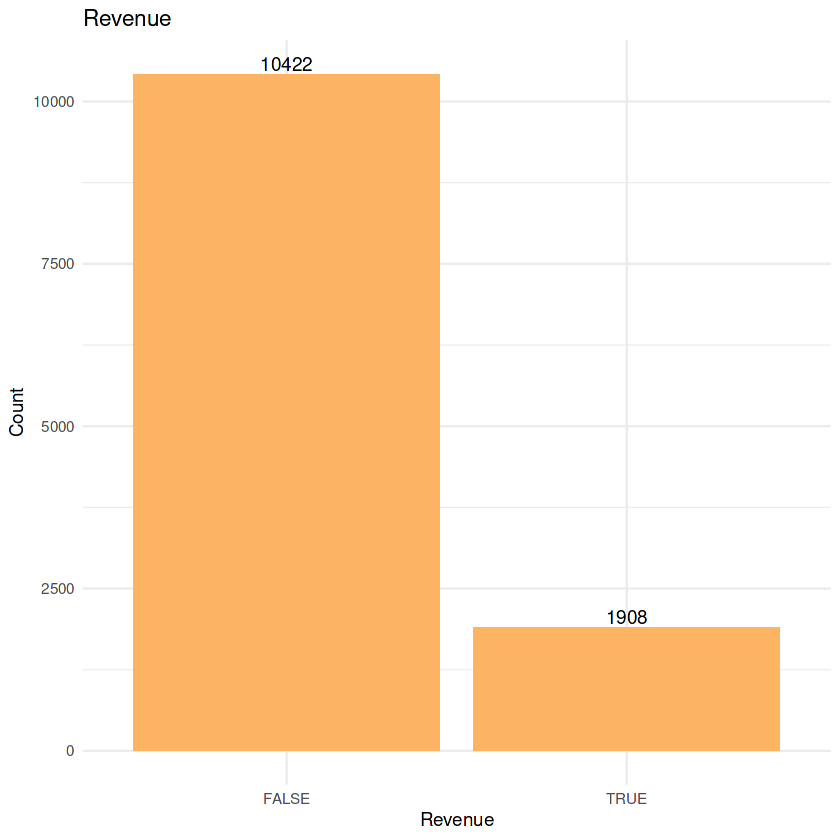

In [17]:
# Revenue
ggplot(df, aes(x = factor(Revenue))) +
  geom_bar(fill = "#FDB462") +
  geom_text(stat='count', aes(label=..count..), vjust=-0.25) +
  labs(title="Revenue", x="Revenue", y="Count") +
  theme_minimal()

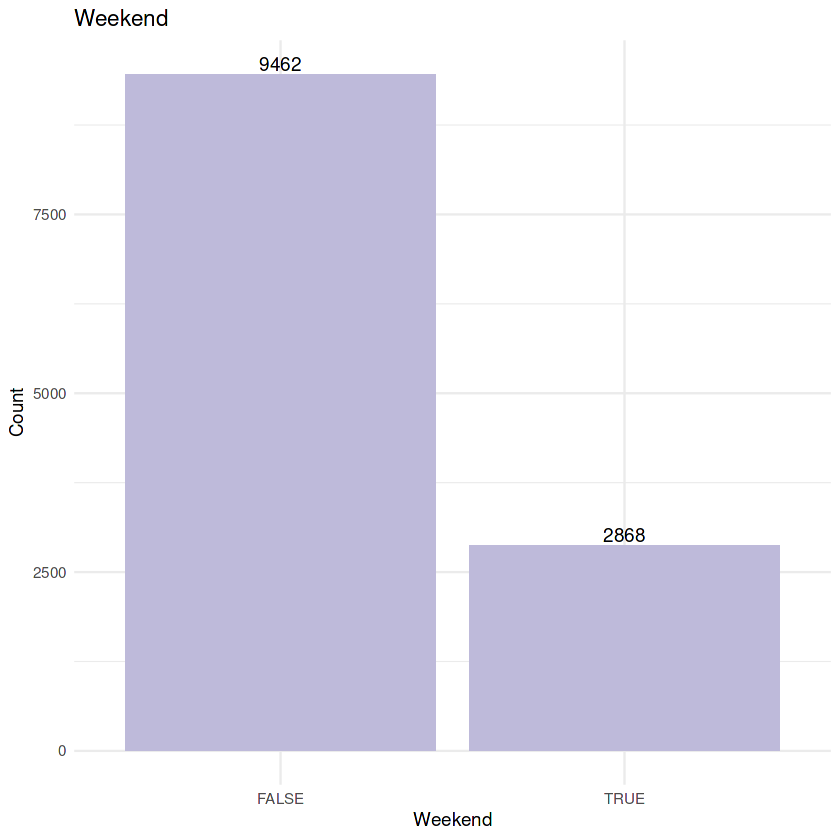

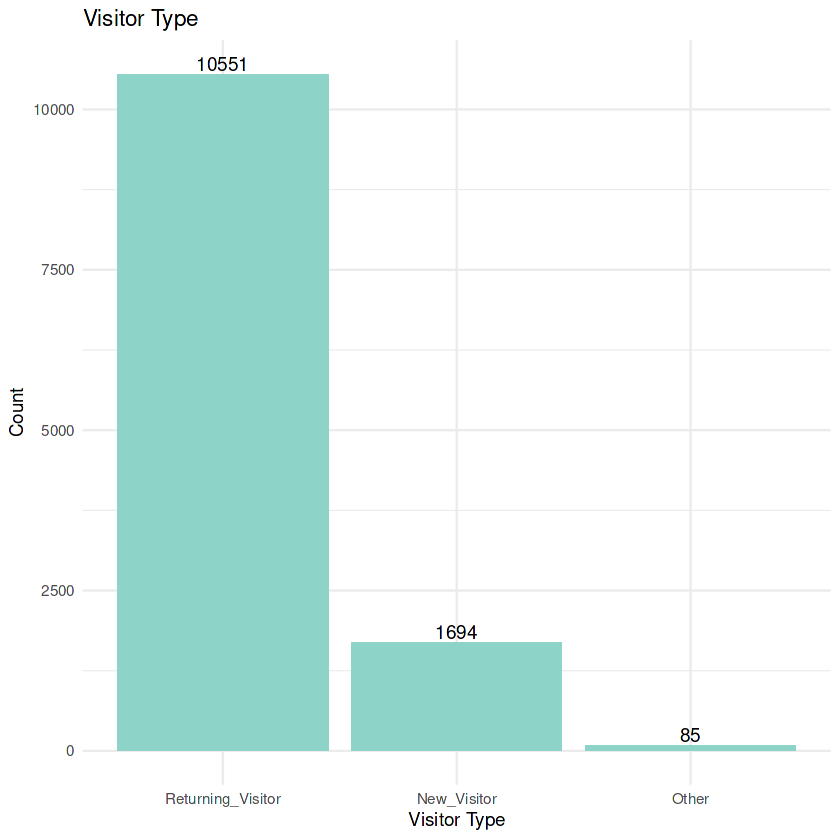

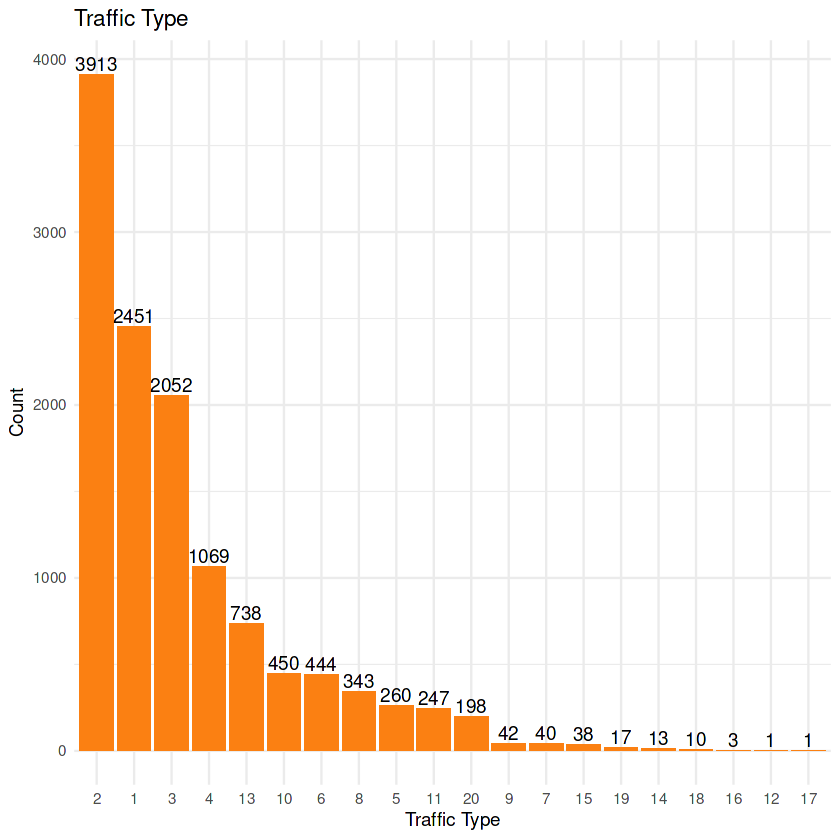

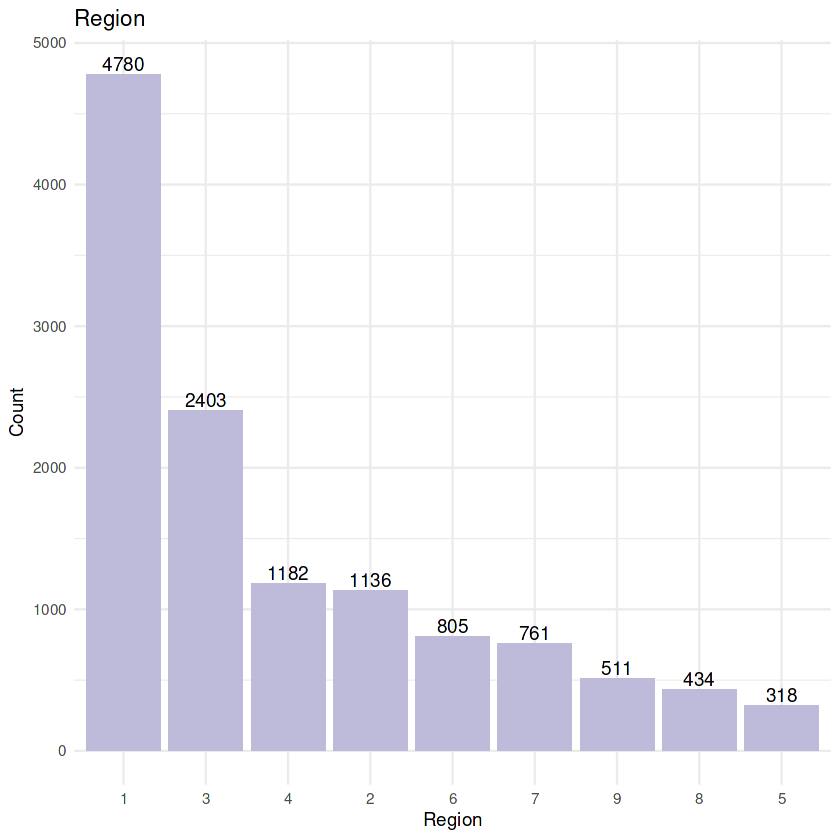

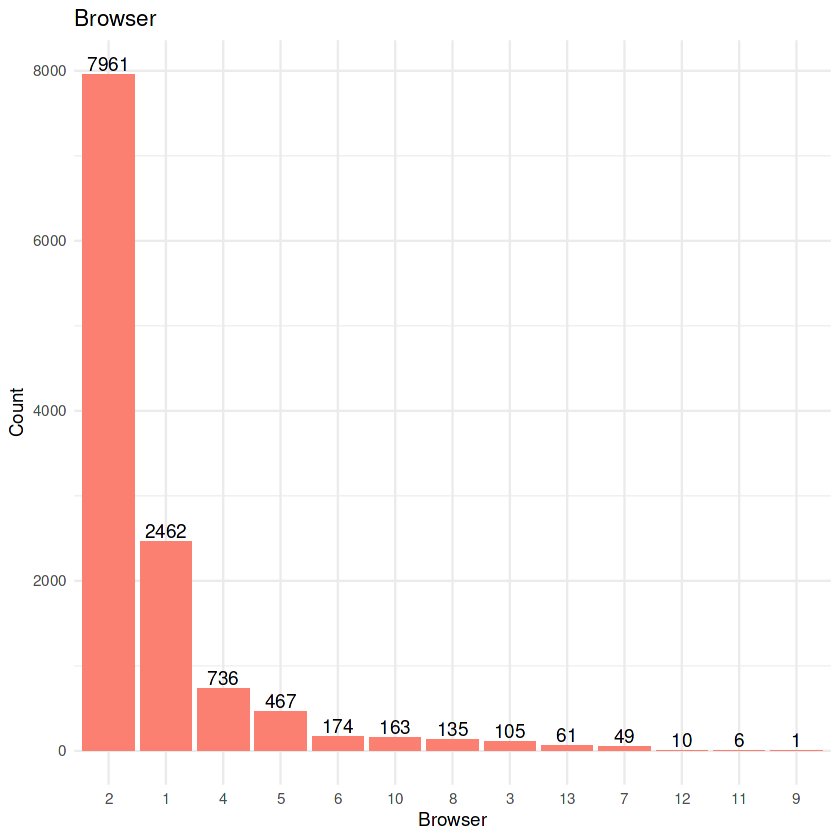

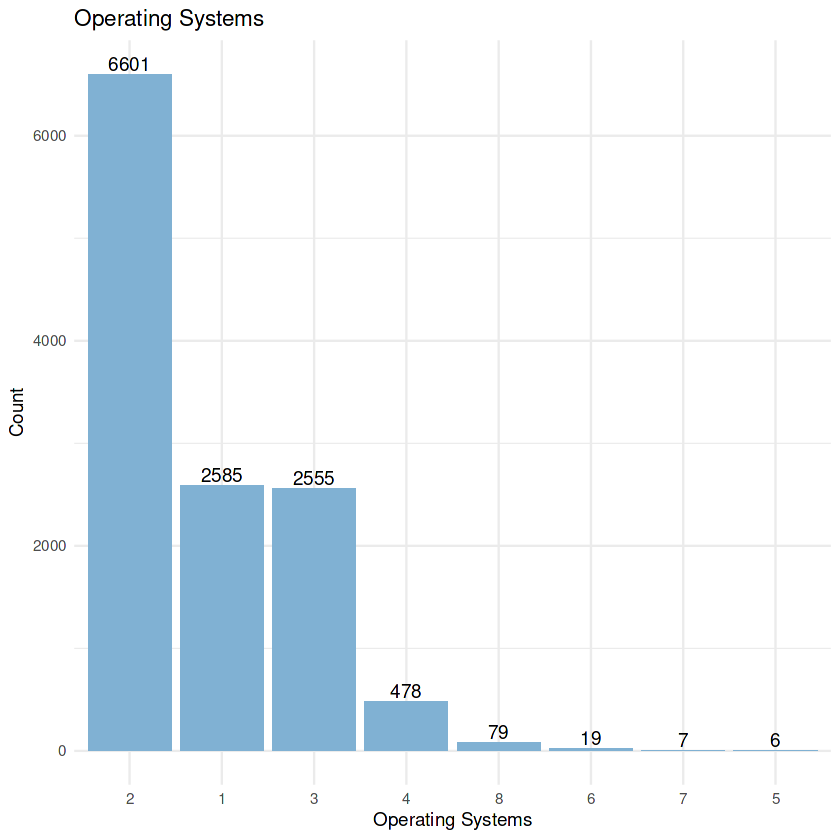

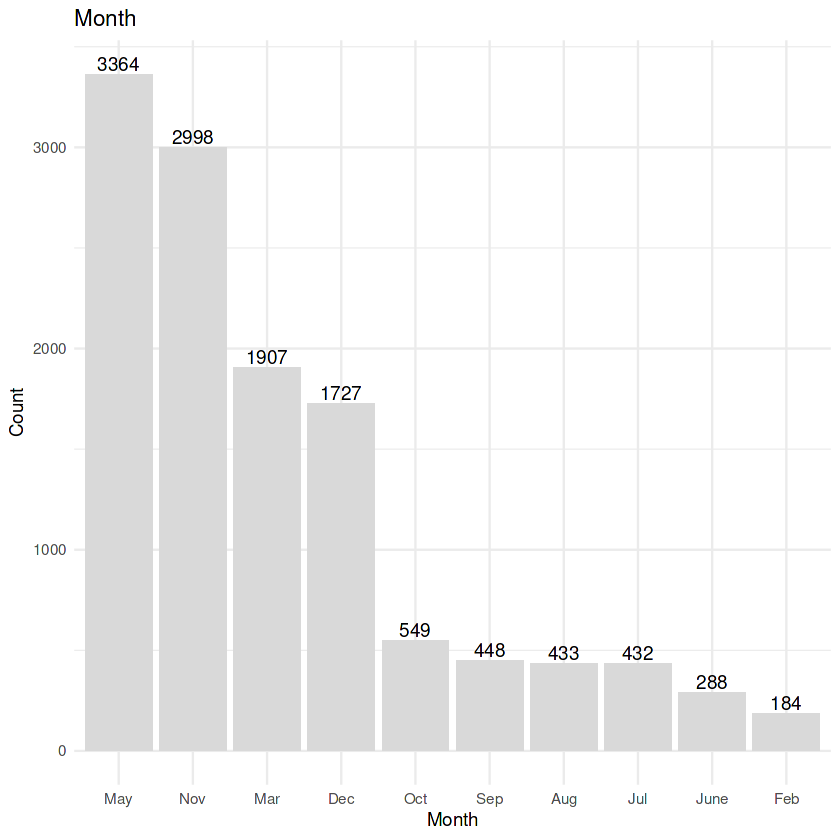

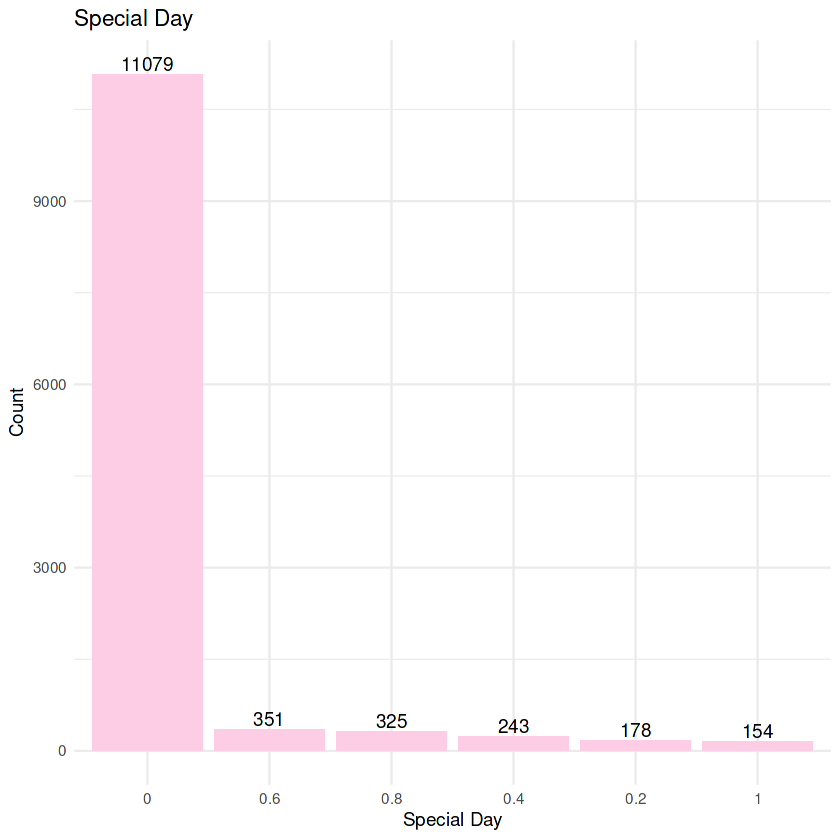

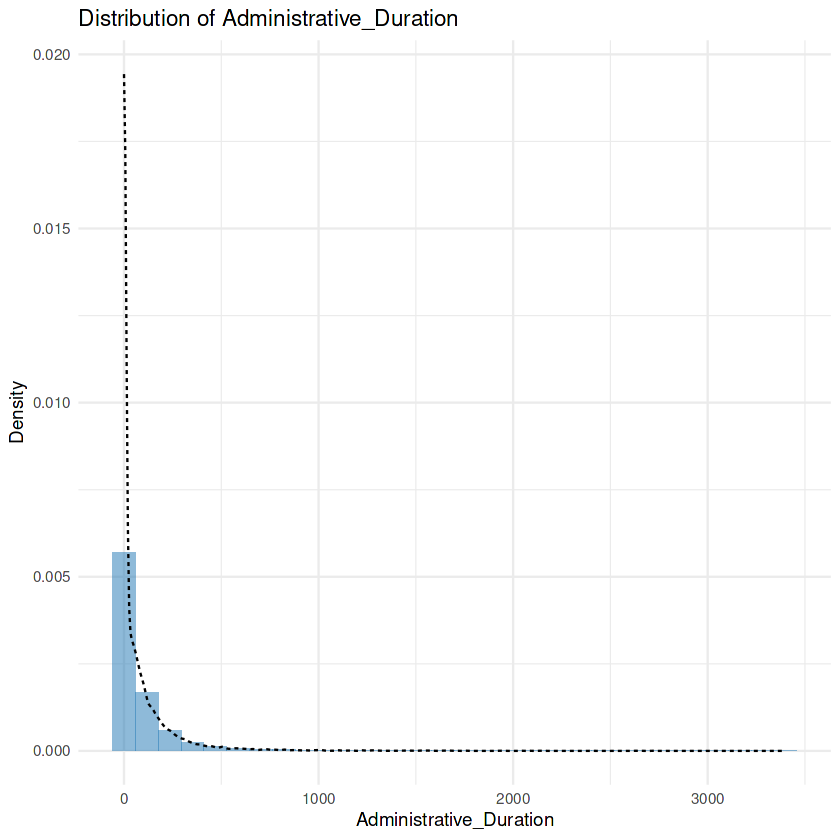

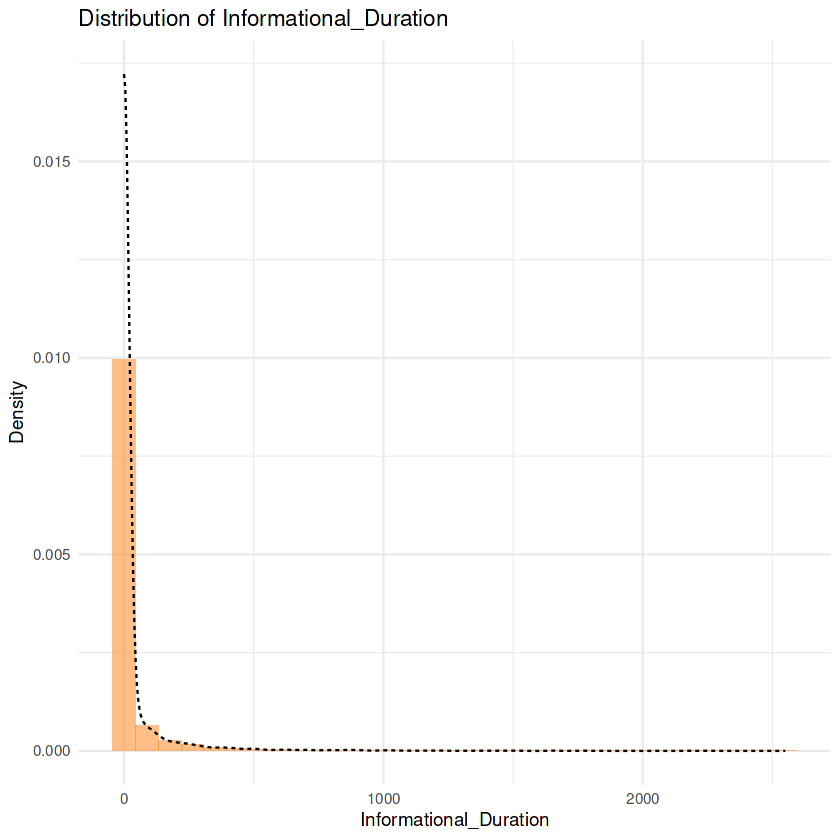

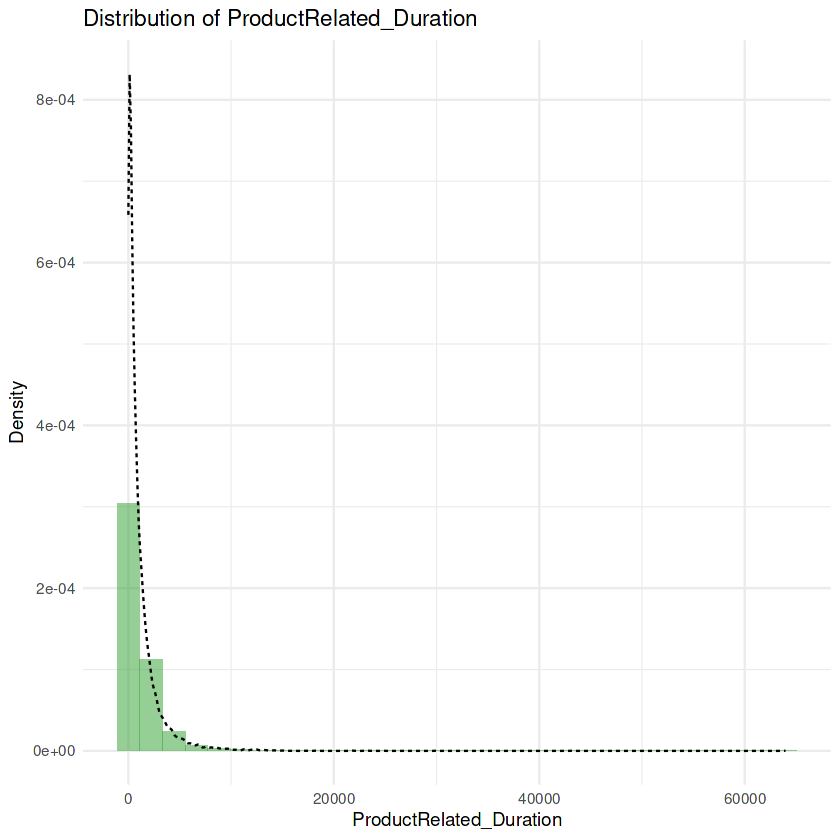

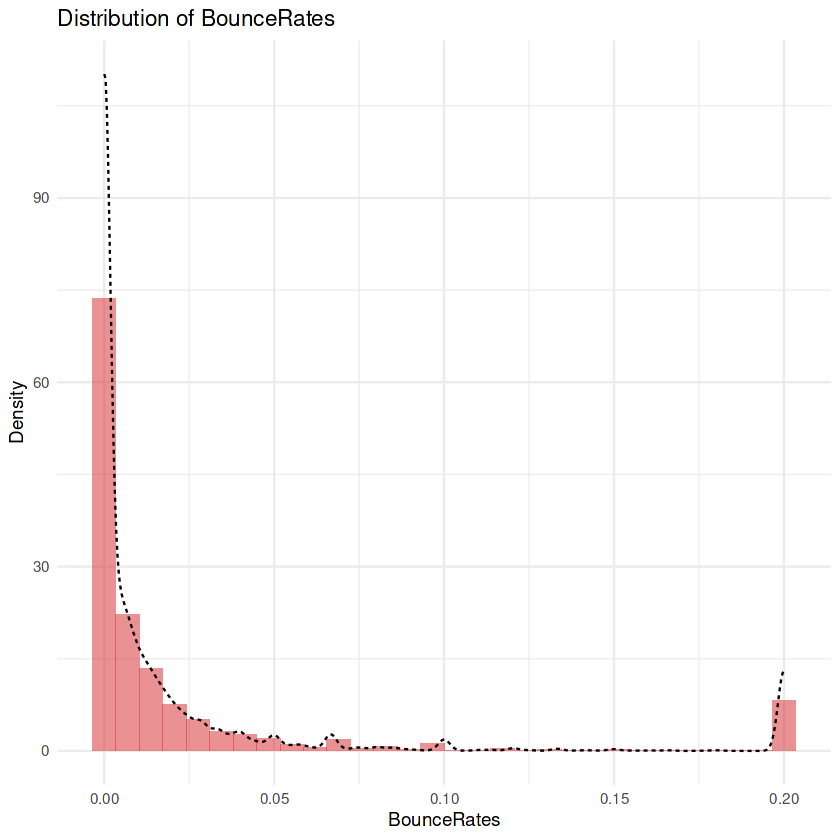

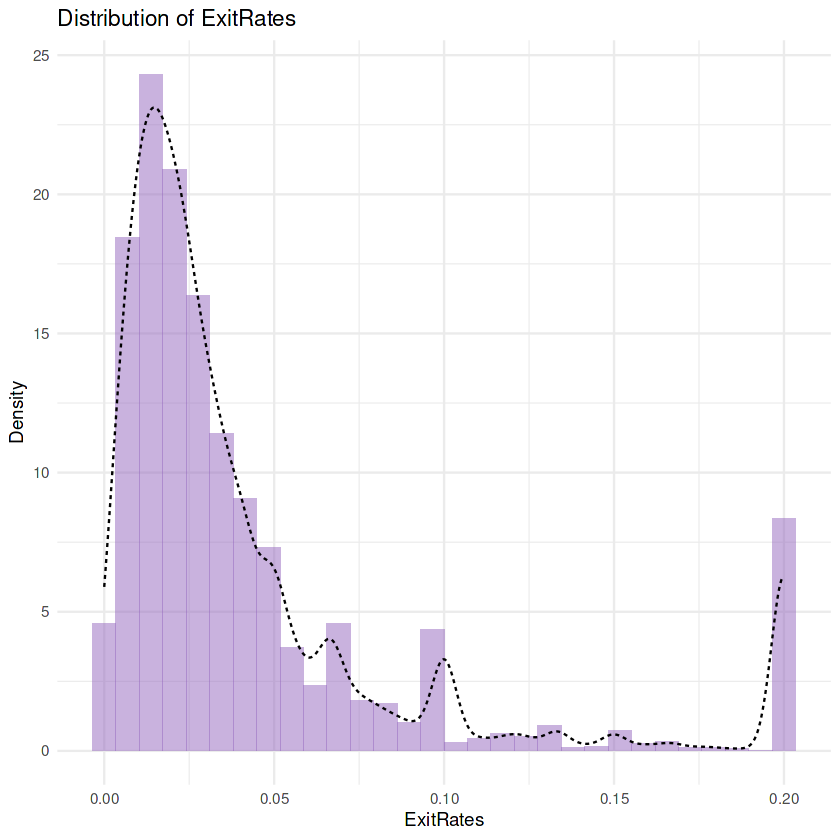

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


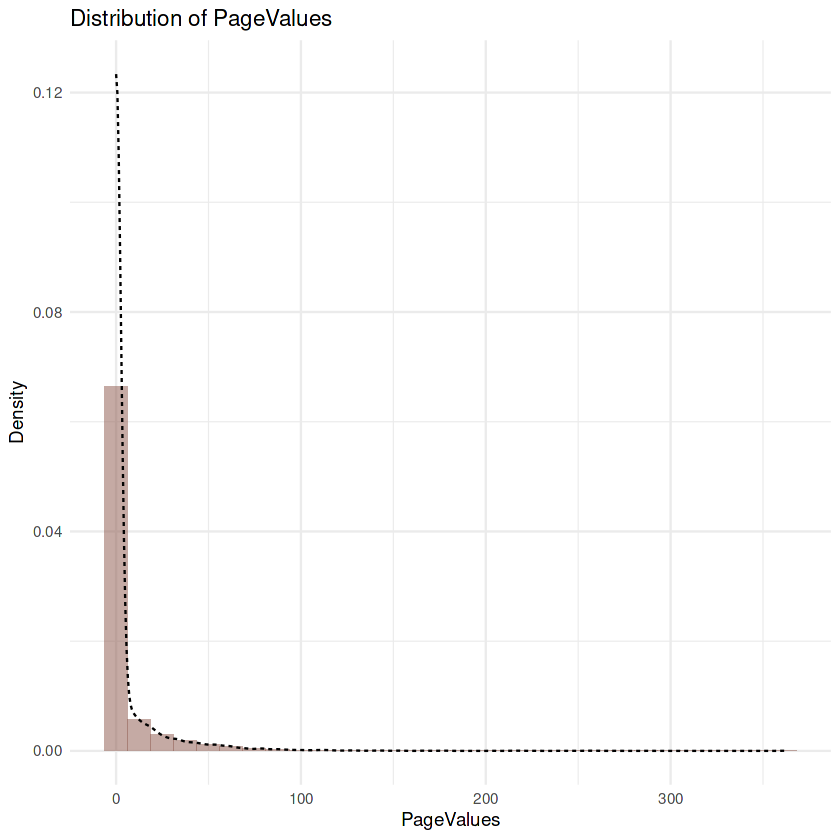

`geom_smooth()` using formula = 'y ~ x'


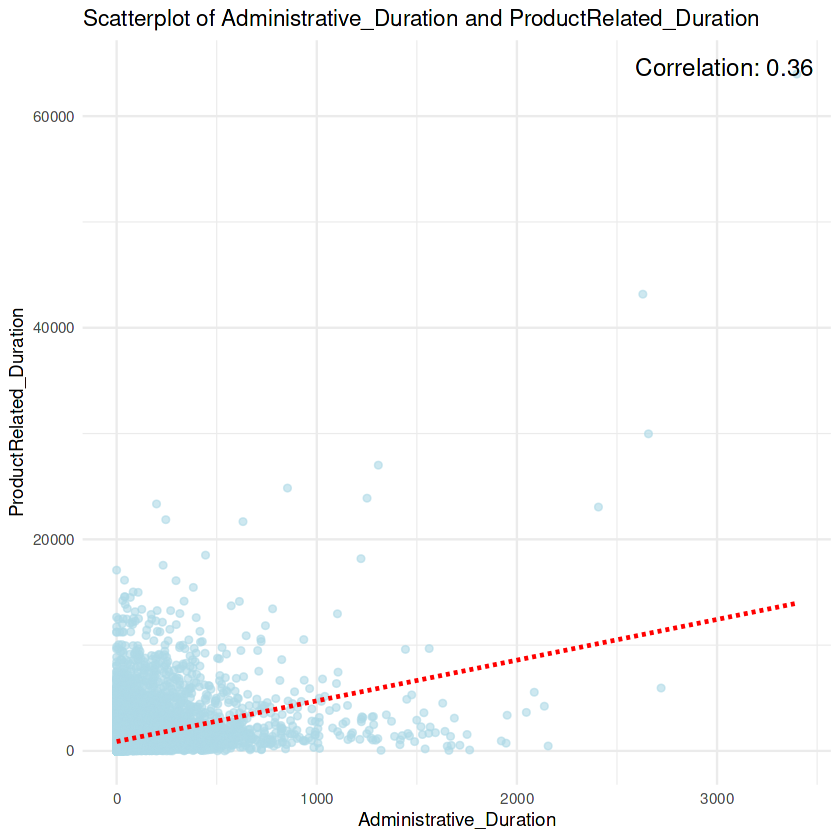

`geom_smooth()` using formula = 'y ~ x'


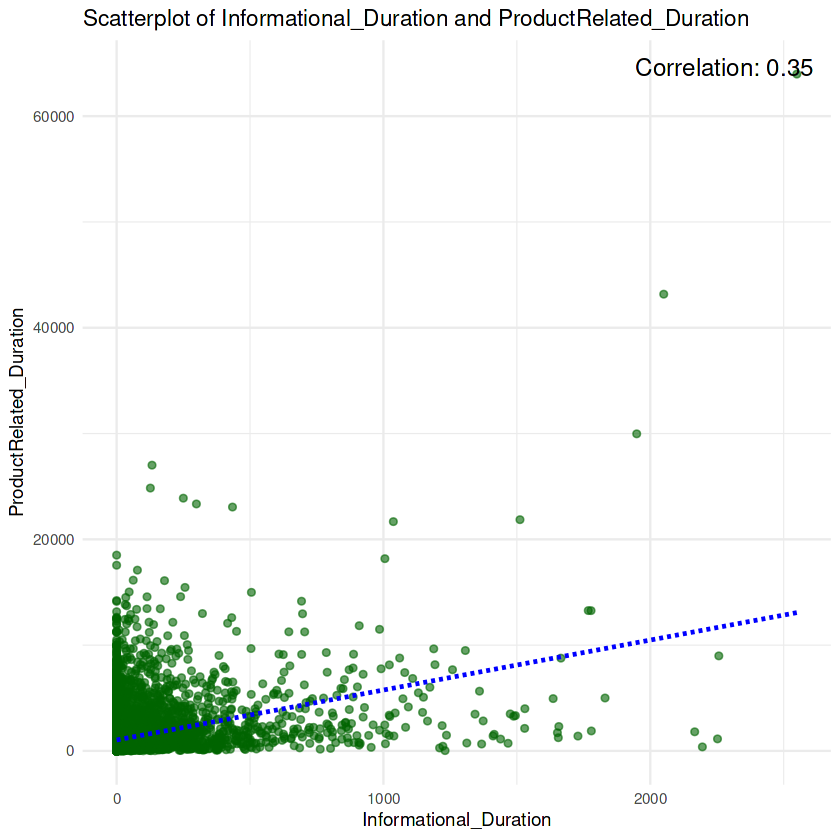

`geom_smooth()` using formula = 'y ~ x'


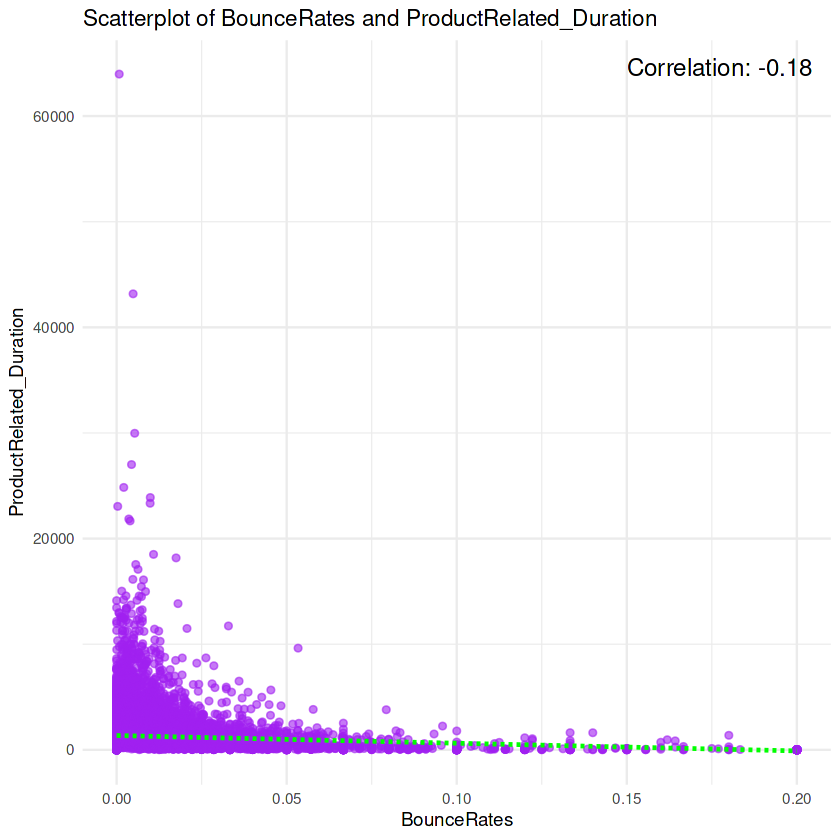

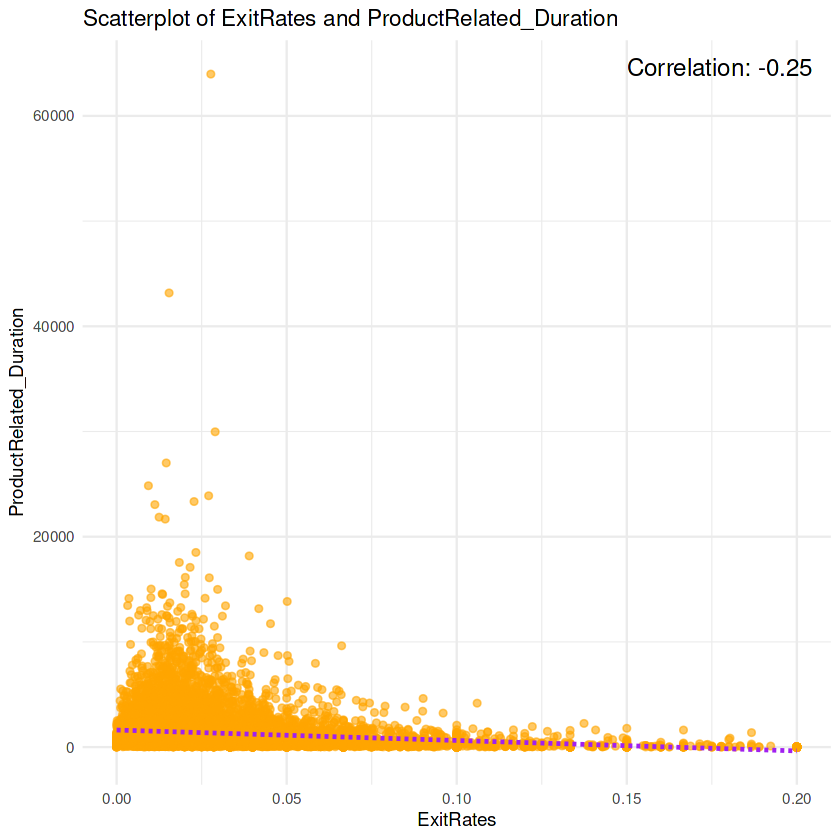

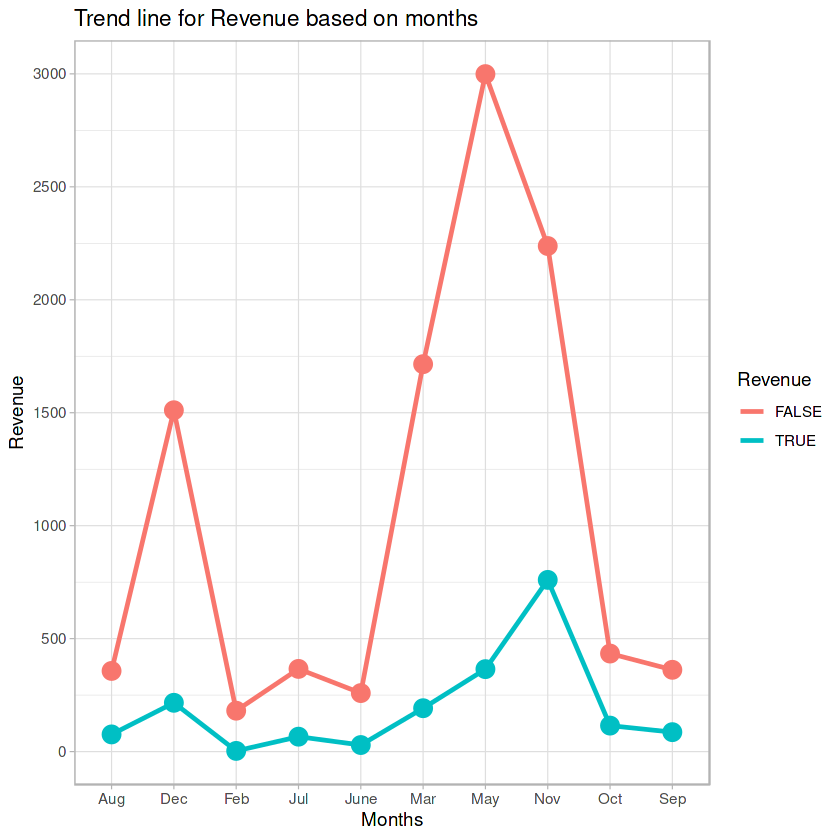

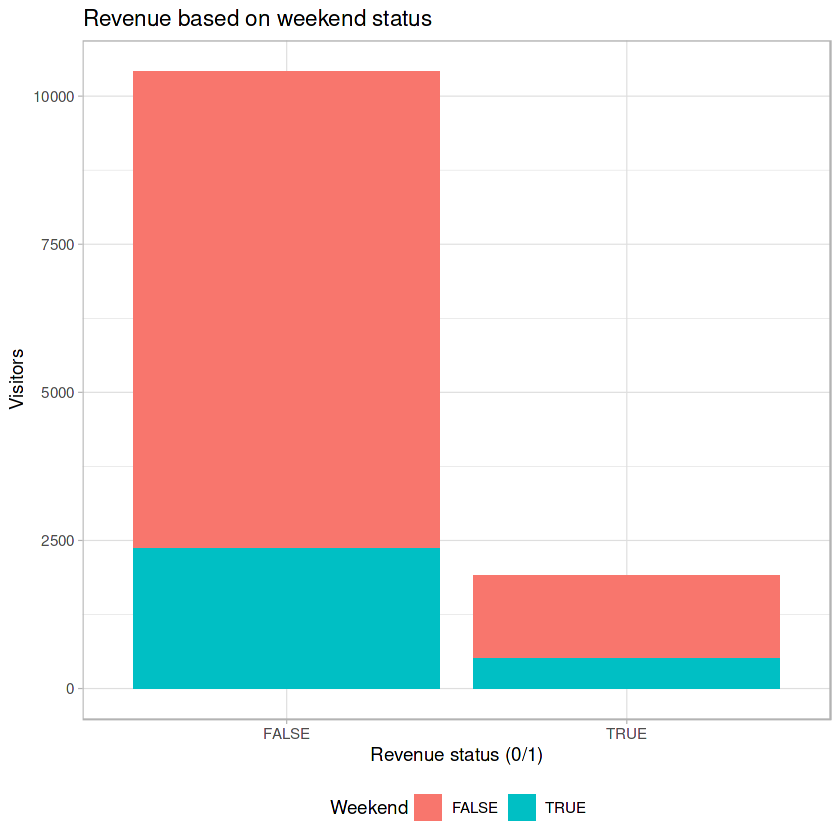

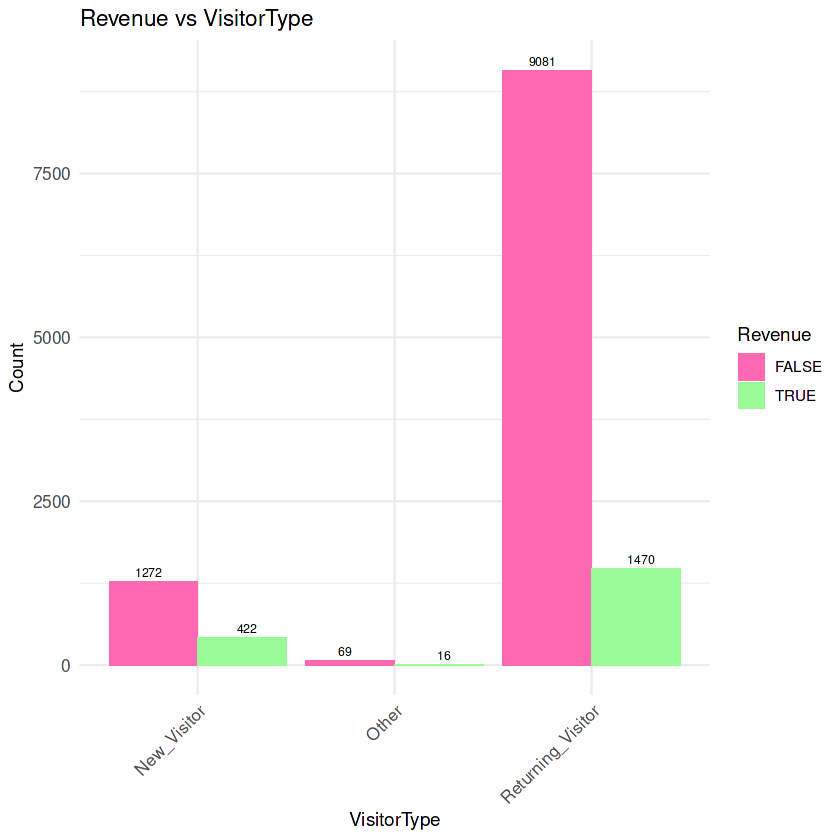

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


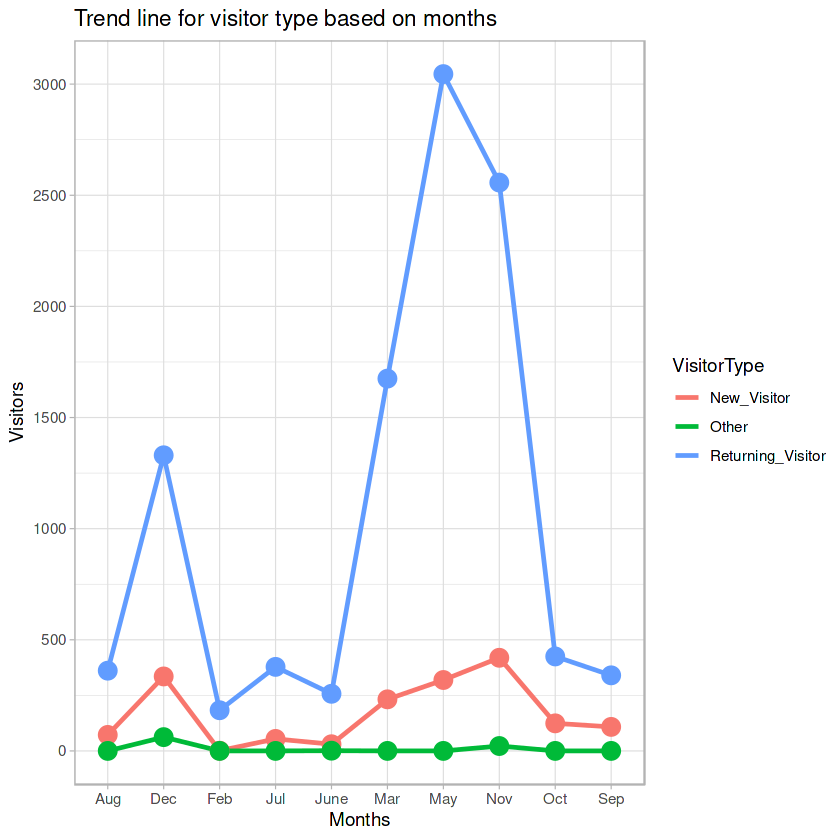

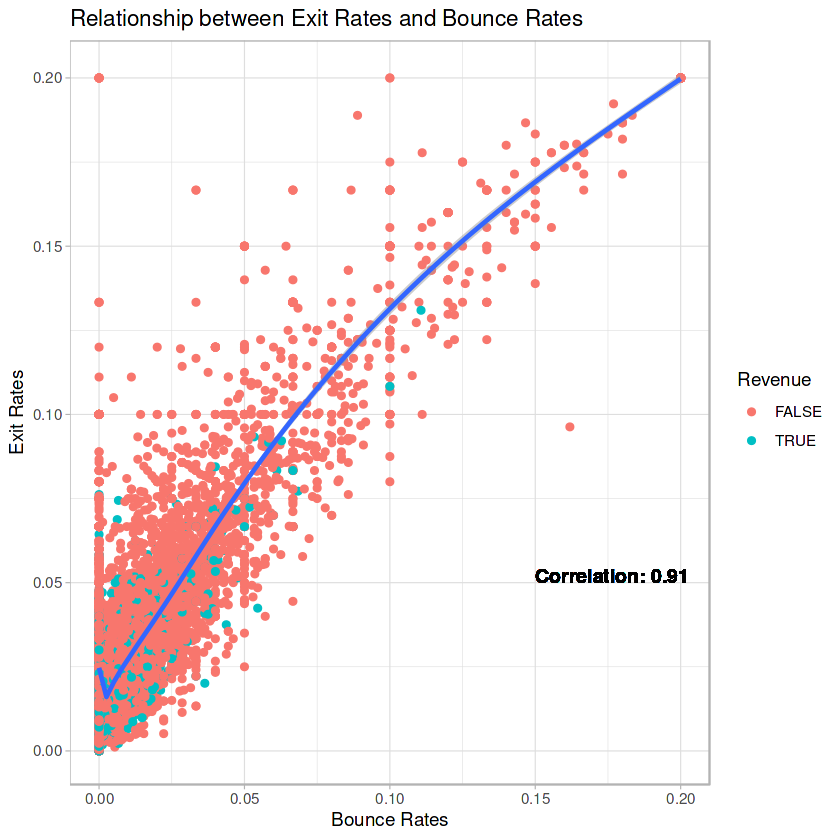

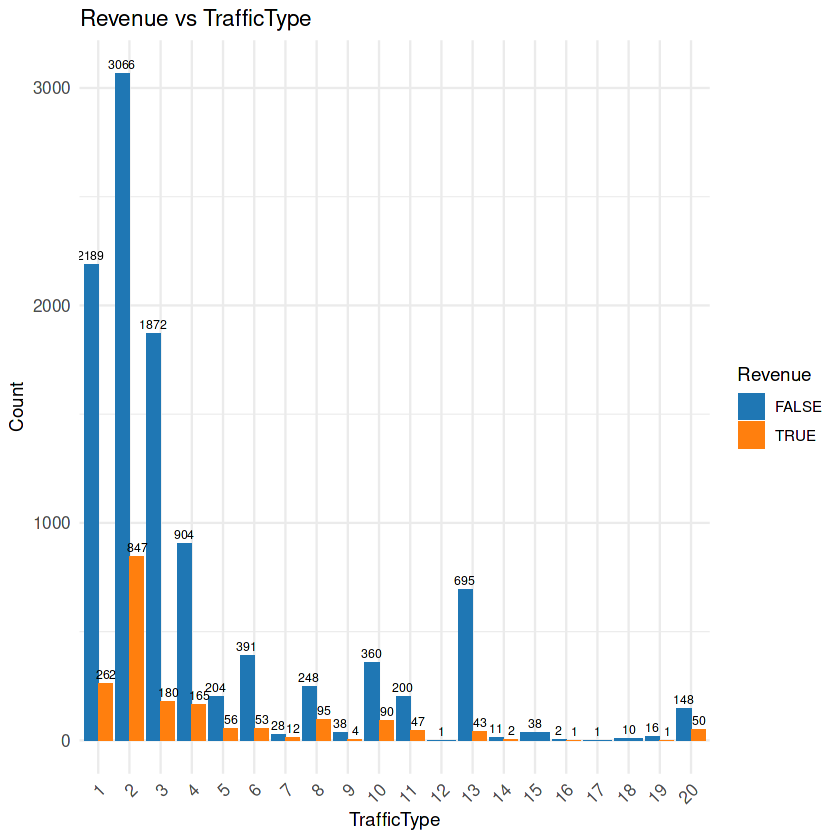

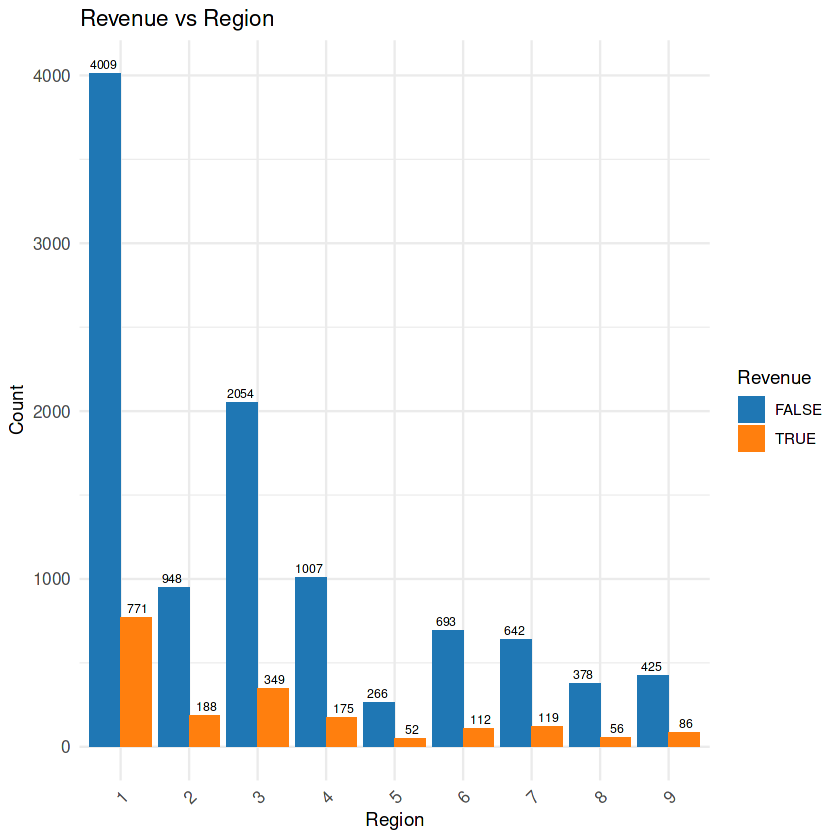

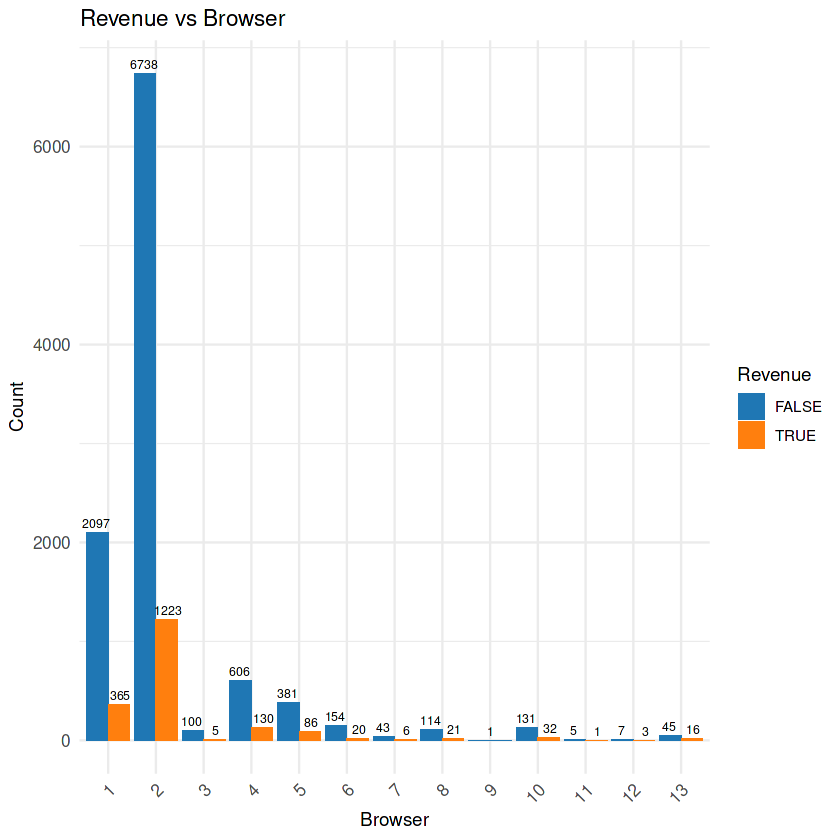

In [18]:
# Weekend
ggplot(df, aes(x = factor(Weekend))) +
  geom_bar(fill = "#BEBADA") +
  geom_text(stat='count', aes(label=..count..), vjust=-0.25) +
  labs(title="Weekend", x="Weekend", y="Count") +
  theme_minimal()


# Other non-logical variables should still use `forcats::fct_infreq` as they were.

# VisitorType
ggplot(df, aes(x = forcats::fct_infreq(VisitorType))) +
  geom_bar(fill = "#8DD3C7") +
  geom_text(stat='count', aes(label=..count..), vjust=-0.25) +
  labs(title="Visitor Type", x="Visitor Type", y="Count") +
  theme_minimal()


# TrafficType
ggplot(df, aes(x = forcats::fct_infreq(factor(TrafficType)))) +
  geom_bar(fill = "#FB8012") +
  geom_text(stat='count', aes(label=..count..), vjust=-0.25) +
  labs(title="Traffic Type", x="Traffic Type", y="Count") +
  theme_minimal()


# Region
ggplot(df, aes(x = forcats::fct_infreq(factor(Region)))) +
  geom_bar(fill = "#BEBADA") +
  geom_text(stat='count', aes(label=..count..), vjust=-0.25) +
  labs(title="Region", x="Region", y="Count") +
  theme_minimal()


# Browser
ggplot(df, aes(x = forcats::fct_infreq(factor(Browser)))) +
  geom_bar(fill = "#FB8072") +
  geom_text(stat='count', aes(label=..count..), vjust=-0.25) +
  labs(title="Browser", x="Browser", y="Count") +
  theme_minimal()


# OperatingSystems
ggplot(df, aes(x = forcats::fct_infreq(factor(OperatingSystems)))) +
  geom_bar(fill = "#80B1D3") +
  geom_text(stat='count', aes(label=..count..), vjust=-0.25) +
  labs(title="Operating Systems", x="Operating Systems", y="Count") +
  theme_minimal()


# Month
ggplot(df, aes(x = forcats::fct_infreq(Month))) +
  geom_bar(fill = "#D9D9D9") +
  geom_text(stat='count', aes(label=..count..), vjust=-0.25) +
  labs(title="Month", x="Month", y="Count") +
  theme_minimal()


# SpecialDay
ggplot(df, aes(x = forcats::fct_infreq(factor(SpecialDay)))) +
  geom_bar(fill = "#FCCDE5") +
  geom_text(stat='count', aes(label=..count..), vjust=-0.25) +
  labs(title="Special Day", x="Special Day", y="Count") +
  theme_minimal()


# Administrative_Duration
ggplot(df, aes(x = Administrative_Duration)) +
  geom_histogram(aes(y = ..density..), fill = "#1f77b4", alpha = 0.5, bins = 30) +
  geom_density(color = "black", linetype = "dashed") +
  theme_minimal() +
  labs(title = "Distribution of Administrative_Duration", x = "Administrative_Duration", y = "Density")


# Informational_Duration
ggplot(df, aes(x = Informational_Duration)) +
  geom_histogram(aes(y = ..density..), fill = "#ff7f0e", alpha = 0.5, bins = 30) +
  geom_density(color = "black", linetype = "dashed") +
  theme_minimal() +
  labs(title = "Distribution of Informational_Duration", x = "Informational_Duration", y = "Density")


# ProductRelated_Duration
ggplot(df, aes(x = ProductRelated_Duration)) +
  geom_histogram(aes(y = ..density..), fill = "#2ca02c", alpha = 0.5, bins = 30) +
  geom_density(color = "black", linetype = "dashed") +
  theme_minimal() +
  labs(title = "Distribution of ProductRelated_Duration", x = "ProductRelated_Duration", y = "Density")


# BounceRates
ggplot(df, aes(x = BounceRates)) +
  geom_histogram(aes(y = ..density..), fill = "#d62728", alpha = 0.5, bins = 30) +
  geom_density(color = "black", linetype = "dashed") +
  theme_minimal() +
  labs(title = "Distribution of BounceRates", x = "BounceRates", y = "Density")


# ExitRates
ggplot(df, aes(x = ExitRates)) +
  geom_histogram(aes(y = ..density..), fill = "#9467bd", alpha = 0.5, bins = 30) +
  geom_density(color = "black", linetype = "dashed") +
  theme_minimal() +
  labs(title = "Distribution of ExitRates", x = "ExitRates", y = "Density")


# PageValues
ggplot(df, aes(x = PageValues)) +
  geom_histogram(aes(y = ..density..), fill = "#8c564b", alpha = 0.5, bins = 30) +
  geom_density(color = "black", linetype = "dashed") +
  theme_minimal() +
  labs(title = "Distribution of PageValues", x = "PageValues", y = "Density")


cor_ad <- cor(df$Administrative_Duration, df$ProductRelated_Duration)
cor_id <- cor(df$Informational_Duration, df$ProductRelated_Duration)
cor_br <- cor(df$BounceRates, df$ProductRelated_Duration)
cor_er <- cor(df$ExitRates, df$ProductRelated_Duration)


# Scatterplot for Administrative_Duration
ggplot(df, aes(x = Administrative_Duration, y = ProductRelated_Duration)) +
  geom_point(color = 'lightblue', alpha = 0.6) +
  geom_smooth(method = 'lm', col = 'red', linetype = 'dashed', size = 1, se = FALSE) +
  annotate("text", x = Inf, y = Inf, label = sprintf("Correlation: %.2f", cor_ad), hjust = 1.1, vjust = 2, size = 5) +
  labs(title = 'Scatterplot of Administrative_Duration and ProductRelated_Duration') +
  theme_minimal()
## Warning: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
## ℹ Please use `linewidth` instead.
## This warning is displayed once every 8 hours.
## Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
## generated.
## `geom_smooth()` using formula = 'y ~ x'


# Scatterplot for Informational_Duration
ggplot(df, aes(x = Informational_Duration, y = ProductRelated_Duration)) +
  geom_point(color = 'darkgreen', alpha = 0.6) +
  geom_smooth(method = 'lm', col = 'blue', linetype = 'dashed', size = 1, se = FALSE) +
  annotate("text", x = Inf, y = Inf, label = sprintf("Correlation: %.2f", cor_id), hjust = 1.1, vjust = 2, size = 5) +
  labs(title = 'Scatterplot of Informational_Duration and ProductRelated_Duration') +
  theme_minimal()
## `geom_smooth()` using formula = 'y ~ x'


# Scatterplot for BounceRates
ggplot(df, aes(x = BounceRates, y = ProductRelated_Duration)) +
  geom_point(color = 'purple', alpha = 0.6) +
  geom_smooth(method = 'lm', col = 'green', linetype = 'dashed', size = 1, se = FALSE) +
  annotate("text", x = Inf, y = Inf, label = sprintf("Correlation: %.2f", cor_br), hjust = 1.1, vjust = 2, size = 5) +
  labs(title = 'Scatterplot of BounceRates and ProductRelated_Duration') +
  theme_minimal()
## `geom_smooth()` using formula = 'y ~ x'


# Scatterplot for ExitRates
ggplot(df, aes(x = ExitRates, y = ProductRelated_Duration)) +
  geom_point(color = 'orange', alpha = 0.6) +
  geom_smooth(method = 'lm', col = 'purple', linetype = 'dashed', size = 1, se = FALSE) +
  annotate("text", x = Inf, y = Inf, label = sprintf("Correlation: %.2f", cor_er), hjust = 1.1, vjust = 2, size = 5) +
  labs(title = 'Scatterplot of ExitRates and ProductRelated_Duration') +
  theme_minimal()
## `geom_smooth()` using formula = 'y ~ x'


# Copy the relevant rows into df_categorical
df_categorical <- df[df$Revenue %in% c(TRUE, FALSE), ]

# Convert columns to categorical variables
df_categorical$Weekend <- as.factor(df_categorical$Weekend)
df_categorical$VisitorType <- as.factor(df_categorical$VisitorType)
df_categorical$TrafficType <- as.factor(df_categorical$TrafficType)
df_categorical$Region <- as.factor(df_categorical$Region)
df_categorical$Browser <- as.factor(df_categorical$Browser)
df_categorical$OperatingSystems <- as.factor(df_categorical$OperatingSystems)
df_categorical$Month <- as.factor(df_categorical$Month)

# Set the label size
label_size <- 10

# trendline for Revenue
trend <- data.frame(table(df$Revenue, df$Month))
names(trend) <- c("Revenue", "Month", "Frequency")
ggplot(data = trend, mapping = aes(x = Month, y = Frequency)) + geom_line(mapping = aes(color = Revenue, group = Revenue), lwd = 1) +
  geom_point(mapping = aes(color = Revenue, group = Revenue, size = 0.1), show.legend = FALSE) + theme_light() +
  scale_y_continuous(breaks = seq(from = 0, to = 4000, by = 500)) +
  ggtitle("Trend line for Revenue based on months") + xlab("Months") + ylab("Revenue")


# StackedPlot for weekend
ggplot(data = df, mapping = aes(x = Revenue)) +
  geom_bar(mapping = aes(fill = Weekend)) + theme_light() +
  ggtitle("Revenue based on weekend status") + xlab("Revenue status (0/1)") + ylab("Visitors") +
  theme(legend.position = "bottom")


# Bar plot for VisitorType
ggplot(df_categorical, aes(x = VisitorType, fill = Revenue)) +
  geom_bar(position = "dodge") +
  labs(title = "Revenue vs VisitorType", x = "VisitorType", y = "Count") +
  theme_minimal() +
  scale_fill_manual(values = c("#FF69B4", "#98FB98")) +
  geom_text(stat = "count", aes(label = after_stat(count)), position = position_dodge(width = 1), vjust = -0.5, size = 2.5) +
  guides(fill = guide_legend(title = "Revenue")) +
  theme(axis.text = element_text(size = label_size),
        axis.text.x = element_text(size = label_size, angle = 45, hjust = 1))


# trendline for Visitor Type
trend <- data.frame(table(df$VisitorType, df$Month))
names(trend) <- c("VisitorType", "Month", "Frequency")
ggplot(data = trend, mapping = aes(x = Month, y = Frequency)) + geom_line(mapping = aes(color = VisitorType, group = VisitorType), lwd = 1) +
  geom_point(mapping = aes(color = VisitorType, group = VisitorType, size = 0.1), show.legend = FALSE) + theme_light() +
  scale_y_continuous(breaks = seq(from = 0, to = 4000, by = 500)) +
  ggtitle("Trend line for visitor type based on months") + xlab("Months") + ylab("Visitors")


# Scatterplot for bounce and exit rates
ggplot(data = df, mapping = aes(x = BounceRates, y = ExitRates)) +
  geom_point(mapping = aes(color = Revenue)) +
  geom_smooth(se = TRUE, alpha = 0.5) +
  geom_text(label = paste("Correlation:", round(cor(df$BounceRates, df$ExitRates), 2)),
            x = 0.15, y = 0.05, hjust = 0, vjust = 0,
            size = 4, color = "black", fontface = "bold") +
  theme_light() +
  ggtitle("Relationship between Exit Rates and Bounce Rates") +
  xlab("Bounce Rates") +
  ylab("Exit Rates")
## `geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


# Bar plot for TrafficType
ggplot(df_categorical, aes(x = TrafficType, fill = Revenue)) +
  geom_bar(position = "dodge") +
  labs(title = "Revenue vs TrafficType", x = "TrafficType", y = "Count") +
  theme_minimal() +
  scale_fill_manual(values = c("#1f77b4", "#ff7f0e")) +
  geom_text(stat = "count", aes(label = after_stat(count)), position = position_dodge(width = 1), vjust = -0.5, size = 2.5) +
  guides(fill = guide_legend(title = "Revenue")) +
  theme(axis.text = element_text(size = label_size),
        axis.text.x = element_text(size = label_size, angle = 45, hjust = 1))


# Bar plot for Region
ggplot(df_categorical, aes(x = Region, fill = Revenue)) +
  geom_bar(position = "dodge") +
  labs(title = "Revenue vs Region", x = "Region", y = "Count") +
  theme_minimal() +
  scale_fill_manual(values = c("#1f77b4", "#ff7f0e")) +
  geom_text(stat = "count", aes(label = after_stat(count)), position = position_dodge(width = 1), vjust = -0.5, size = 2.5) +
  guides(fill = guide_legend(title = "Revenue")) +
  theme(axis.text = element_text(size = label_size),
        axis.text.x = element_text(size = label_size, angle = 45, hjust = 1))


# Bar plot for Browser
ggplot(df_categorical, aes(x = Browser, fill = Revenue)) +
  geom_bar(position = "dodge") +
  labs(title = "Revenue vs Browser", x = "Browser", y = "Count") +
  theme_minimal() +
  scale_fill_manual(values = c("#1f77b4", "#ff7f0e")) +
  geom_text(stat = "count", aes(label = after_stat(count)), position = position_dodge(width = 1), vjust = -0.5, size = 2.5) +
  guides(fill = guide_legend(title = "Revenue")) +
  theme(axis.text = element_text(size = label_size),
        axis.text.x = element_text(size = label_size, angle = 45, hjust = 1))

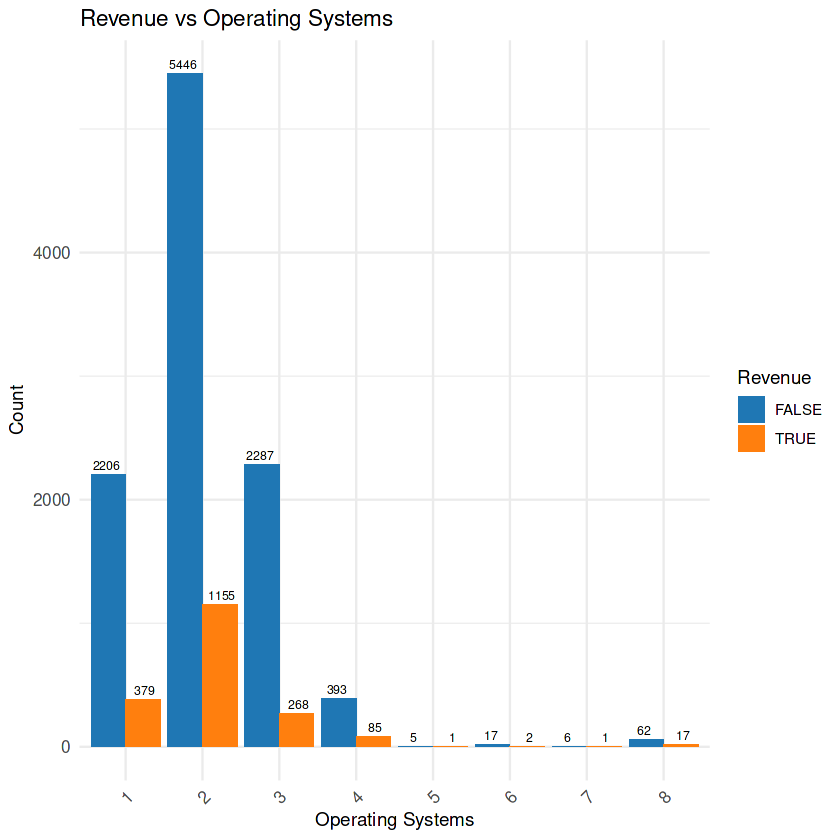

In [19]:
# Bar plot for OperatingSystems
ggplot(df_categorical, aes(x = OperatingSystems, fill = Revenue)) +
  geom_bar(position = "dodge") +
  labs(title = "Revenue vs Operating Systems", x = "Operating Systems", y = "Count") +
  theme_minimal() +
  scale_fill_manual(values = c("#1f77b4", "#ff7f0e")) +
  geom_text(stat = "count", aes(label = after_stat(count)), position = position_dodge(width = 1), vjust = -0.5, size = 2.5) +
  guides(fill = guide_legend(title = "Revenue")) +
  theme(axis.text = element_text(size = label_size),
        axis.text.x = element_text(size = label_size, angle = 45, hjust = 1))

# **Hypothesis Testing**

In [21]:
# set the confidence level

confidence_level <- 0.95

# Hypothesis Test with ProductRelated_Duration as the Target Variable (Pearson Correlation)
correlation <- cor(df$ProductRelated_Duration, df[["Informational_Duration"]])
p_value <- cor.test(df$ProductRelated_Duration, df[["Informational_Duration"]])$p.value
conf_interval <- cor.test(df$ProductRelated_Duration, df[["Informational_Duration"]])$conf.int

# Print the results
cat("Hypothesis Test with ProductRelated_Duration as the Target Variable (Pearson Correlation)\n")
## Hypothesis Test with ProductRelated_Duration as the Target Variable (Pearson Correlation)
cat("Variable of Interest:Informational_Duration", "\n")
## Variable of Interest:Informational_Duration
cat("Null Hypothesis: There is no correlation between ProductRelated_Duration and Informational_Duration", "\n")
## Null Hypothesis: There is no correlation between ProductRelated_Duration and Informational_Duration
cat("Alternate Hypothesis: There is a correlation between ProductRelated_Duration and Informational_Duration", "\n")
## Alternate Hypothesis: There is a correlation between ProductRelated_Duration and Informational_Duration
cat("Correlation:", correlation, "\n")
## Correlation: 0.3473636
cat("p-value:", p_value, "\n")
## p-value: 0
cat("Confidence Interval:", conf_interval[1], "-", conf_interval[2], "\n")
## Confidence Interval: 0.3317464 - 0.3627904
cat("\n")
# Hypothesis Test with ProductRelated_Duration as the Target Variable (t-test)
t_result <- t.test(df$ProductRelated_Duration ~ df$Revenue)

# Print the results
cat("Hypothesis Test with ProductRelated_Duration as the Target Variable (t-test)\n")
## Hypothesis Test with ProductRelated_Duration as the Target Variable (t-test)
cat("Variable of Interest:Revenue", "\n")
## Variable of Interest:Revenue
cat("Null Hypothesis: The mean ProductRelated_Duration is the same for Reveue levels", "\n")
## Null Hypothesis: The mean ProductRelated_Duration is the same for Reveue levels
cat("Alternate Hypothesis: The mean ProductRelated_Duration is different for Revenue Levels", "\n")
## Alternate Hypothesis: The mean ProductRelated_Duration is different for Revenue Levels
cat("t-value:", t_result$statistic, "\n")
## t-value: -14.44699
cat("p-value:", t_result$p.value, "\n")
## p-value: 2.173791e-45
cat("Confidence Interval:", t_result$conf.int[1], "-", t_result$conf.int[2], "\n")
## Confidence Interval: -915.655 - -696.7886
cat("\n")
# Hypothesis Test with Revenue as the Target Variable (Chi-square Test)
cross_table <- table(df$Revenue, df$Region)
chi_square <- chisq.test(cross_table)$statistic
p_value <- chisq.test(cross_table)$p.value

# Print the results
cat("Hypothesis Test with Revenue as the Target Variable (Chi-square Test)\n")
## Hypothesis Test with Revenue as the Target Variable (Chi-square Test)
cat("Variable of Interest:Region", "\n")
## Variable of Interest:Region
cat("Null Hypothesis: There is no association between Revenue and Region", "\n")
## Null Hypothesis: There is no association between Revenue and Region
cat("Alternate Hypothesis: There is an association between Revenue and Region", "\n")
## Alternate Hypothesis: There is an association between Revenue and Region
cat("Chi-square:", chi_square, "\n")
## Chi-square: 9.252751
cat("p-value:", p_value, "\n")
## p-value: 0.321425
cat("\n")
# Hypothesis Test with Revenue as the Target Variable (z-test)
z_result <- prop.test(table(df$Revenue, df$Weekend))

# Print the results
cat("Hypothesis Test with Revenue as the Target Variable (z-test)\n")
## Hypothesis Test with Revenue as the Target Variable (z-test)
cat("Variable of Interest: Weekend", "\n")
## Variable of Interest: Weekend
cat("Null Hypothesis: The proportion of Revenue is the same for Weekend/Weekday", "\n")
## Null Hypothesis: The proportion of Revenue is the same for Weekend/Weekday
cat("Alternate Hypothesis: The proportion of Revenue is different for Weekend/Weekday", "\n")
## Alternate Hypothesis: The proportion of Revenue is different for Weekend/Weekday
cat("z-value:", z_result$statistic, "\n")
## z-value: 10.39098
cat("p-value:", z_result$p.value, "\n")
## p-value: 0.001266325
cat("Confidence Interval:", z_result$conf.int[1], "-", z_result$conf.int[2], "\n")
## Confidence Interval: 0.01261532 - 0.05583024
cat("\n")

Hypothesis Test with ProductRelated_Duration as the Target Variable (Pearson Correlation)
Variable of Interest:Informational_Duration 
Null Hypothesis: There is no correlation between ProductRelated_Duration and Informational_Duration 
Alternate Hypothesis: There is a correlation between ProductRelated_Duration and Informational_Duration 
Correlation: 0.3473636 
p-value: 0 
Confidence Interval: 0.3317464 - 0.3627904 

Hypothesis Test with ProductRelated_Duration as the Target Variable (t-test)
Variable of Interest:Revenue 
Null Hypothesis: The mean ProductRelated_Duration is the same for Reveue levels 
Alternate Hypothesis: The mean ProductRelated_Duration is different for Revenue Levels 
t-value: -14.44699 
p-value: 2.173791e-45 
Confidence Interval: -915.655 - -696.7886 

Hypothesis Test with Revenue as the Target Variable (Chi-square Test)
Variable of Interest:Region 
Null Hypothesis: There is no association between Revenue and Region 
Alternate Hypothesis: There is an association b

# **Correlation Plot**

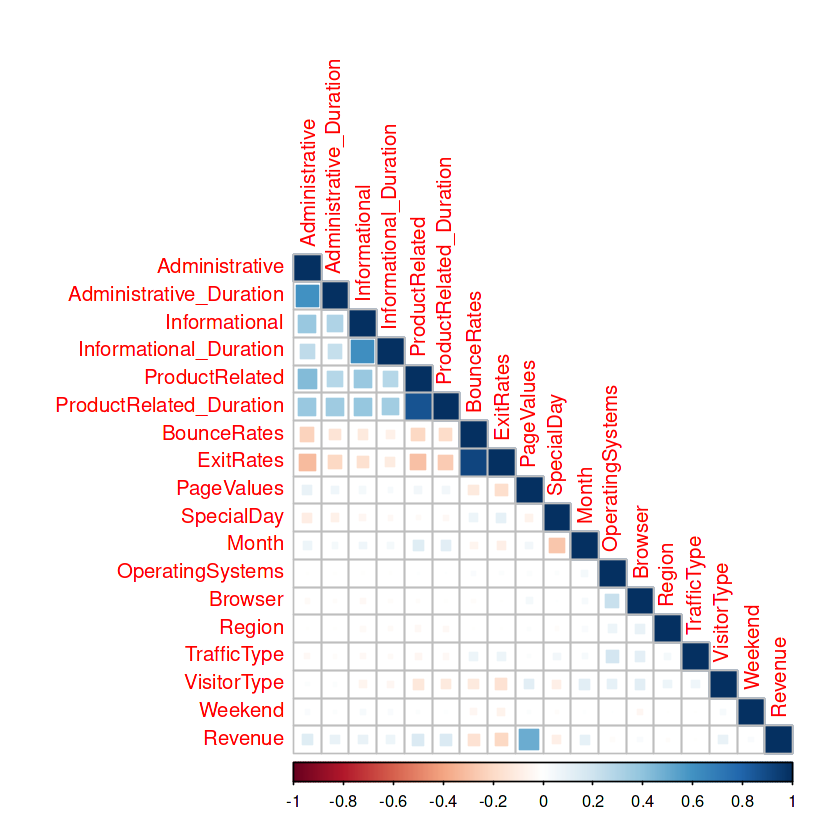

In [22]:
#dataprep for correlation plot
df_corr <- df

# Convert 'Month' to numerical representation
df_corr$Month <- as.numeric(factor(df_corr$Month, levels = unique(df_corr$Month)))

# Convert 'VisitorType' to numerical representation
df_corr$VisitorType <- as.numeric(factor(df_corr$VisitorType, levels = unique(df_corr$VisitorType)))


# Convert logical variables to numeric
df_corr$Weekend <- as.integer(df_corr$Weekend)
df_corr$Revenue <- as.integer(df_corr$Revenue)

# Compute the correlation matrix
cor_matrix <- cor(df_corr)


# Plot the correlation matrix with improved legibility and column names
corrplot(cor_matrix, method = "square", type = "lower", diag = TRUE)

In [23]:
# Compute correlation coefficients with ProductRelated_Duration
correlation <- cor(df_corr$ProductRelated_Duration, df_corr)

# Create a data frame with the correlation value for ProductRelated_Duration
correlation_df <- data.frame(Variable = colnames(df_corr), Correlation = correlation)

# Convert to long format and filter for ProductRelated_Duration
correlation_long <- correlation_df %>%
  pivot_longer(cols = -Variable, names_to = "Variable2", values_to = "Correlation") %>%
  filter(Variable == "ProductRelated_Duration")

# Print the correlation table for ProductRelated_Duration in long format
print(correlation_long)

# A tibble: 18 × 3
   Variable                Variable2                           Correlation
   <chr>                   <chr>                                     <dbl>
 1 ProductRelated_Duration Correlation.Administrative              0.374  
 2 ProductRelated_Duration Correlation.Administrative_Duration     0.355  
 3 ProductRelated_Duration Correlation.Informational               0.388  
 4 ProductRelated_Duration Correlation.Informational_Duration      0.347  
 5 ProductRelated_Duration Correlation.ProductRelated              0.861  
 6 ProductRelated_Duration Correlation.ProductRelated_Duration     1      
 7 ProductRelated_Duration Correlation.BounceRates                -0.185  
 8 ProductRelated_Duration Correlation.ExitRates                  -0.252  
 9 ProductRelated_Duration Correlation.PageValues                  0.0528 
10 ProductRelated_Duration Correlation.SpecialDay                 -0.0364 
11 ProductRelated_Duration Correlation.Month                       0.124  
12 Pro